In [1]:
#import dependencies
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#read in CSVs
nu_data = "data_csv/mens_bball_stats_combined.csv"
load_data = "athlete_load_duration_overall.csv"
master_data = "data_csv/catapult_data/athlete_load_data_master_v1.csv"
nu_stats = pd.read_csv(nu_data)
load_duration = pd.read_csv(load_data)
master_load = pd.read_csv(master_data)

In [2]:
#final stats dataframe
list(master_load)

['id',
 'date',
 'Jersey',
 'total_ima',
 'ima_high_avg',
 'ima_high_total',
 'ima_medium_total',
 'ima_low_total',
 'ima_per_min',
 'ima_accel_high',
 'ima_acel_medium',
 'ima_acel_low',
 'ima_decel_high',
 'ima_decel_medium',
 'ima_decel_low',
 'average_duration',
 'total_player_load',
 'average_player_load',
 'peak_player_load',
 'player_load_per_minute',
 'total_jumps',
 'jumps_avg',
 'jumps_per_minute',
 'high_intensity_jumps',
 'med_intesnity_jumps',
 'low_intensity_jumps',
 'rhie_bout_recovery_max',
 'rhie_bout_recovery_min',
 'rhie_bout_recovery_mean',
 'rhie_effort_duration_max',
 'rhie_effort_duration_min',
 'rhie_effort_duration_max.1',
 'rhie_effort_per_bout',
 'rhie_effort_per_bout_max',
 'rhie_effort_recovery_min',
 'rhie_effort_recovery_mean',
 'rhie_total_bouts',
 'rhie_efforts_per_bout_min']

In [3]:
# Assign the data to X and y

# Assign the data to X and y
# Note: Sklearn requires a 7 x 1 array of values
# so we use reshape to create this

X = master_load.total_ima.values.reshape(-1, 1)
y = master_load.total_jumps.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (3154, 1) (3154, 1)


array([[ 713],
       [ 420],
       [ 436],
       ...,
       [ 496],
       [1220],
       [ 851]])

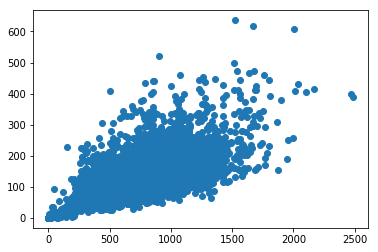

In [4]:
#scatter plot
plt.scatter(X, y)

In [5]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [6]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

master_load['total_ima'].fillna(0, inplace=True)
master_load['total_jumps'].fillna(0, inplace=True)

model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# Print the coefficient and the intercept for the model
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.13585885]]
y-axis intercept:  [32.10586208]


In [8]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0]]
Max X Value: [[2483]]


In [9]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

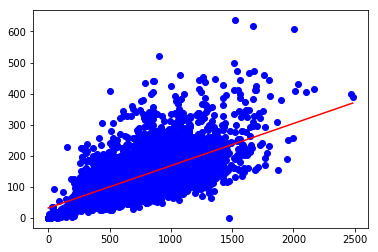

In [10]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

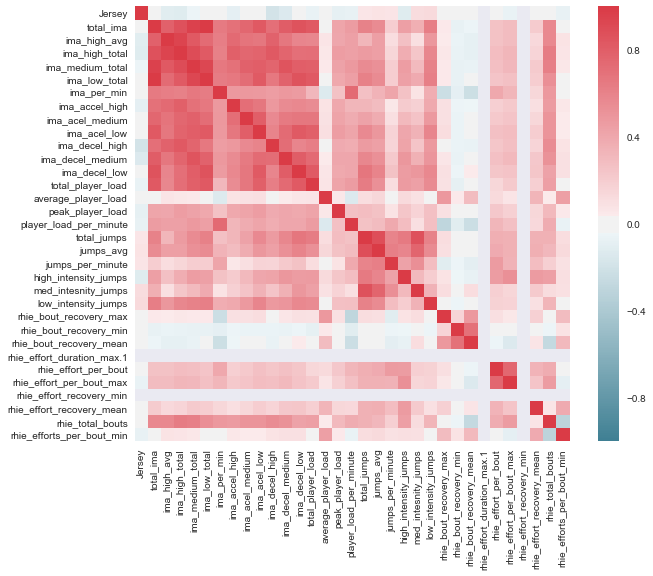

In [11]:
import seaborn as sns


f, ax = plt.subplots(figsize=(10, 8))
corr = master_load.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)